In [21]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import math

In [22]:
# Read, threshold, and resize the image
img = cv2.imread('f2.png', cv2.IMREAD_GRAYSCALE)
ret,im = cv2.threshold(img,140,1,cv2.THRESH_BINARY_INV)
im = cv2.resize(im, (1000, 200))

# Turn th image into an array
imarray = np.array(im)

# Extract pairs from the image array
func_discrete = np.zeros(1000)
for i in range(1000):
    for j in range(200):
        if imarray[j,i] == 1:
            func_discrete[i] = (j - 100)/100
            break

# Define the domain
func_input = np.linspace(0, 1, num=1000)

In [26]:
#Represents the height of the screenshot
h=3.5

# Define what the allowed wavenumbers are
ns = range(1,12)

# Define the basis and turn it into a discrete 
basis = list([lambda x, n=n: (math.sqrt(2) * math.sin(n * 2*math.pi * x)) for n in ns])
basis_array = list()
for i in range(len(basis)):
    array = np.asarray([basis[i](x) for x in func_input])
    basis_array.append(array)

def decompose(phi, x):
    c = np.zeros(len(ns))
    for i in range(len(basis)):
        c[i] = integrate.simpson(phi * basis_array[i], x)
    return c


def plot(c, phi):
    x = np.linspace(0, L, num=100)
    y = np.zeros((size, 100))
    fig, ax = plt.subplots()
    for n in range(len(basis)):
        y[n] = np.asarray([c[n] * basis[n](x0) for x0 in x])
    ax.stackplot(x, *y, baseline='zero', alpha=0.25)
    ax.plot(x, np.asarray([phi(x0) for x0 in x]), color='blue')
    fig.show()

In [27]:
#plt.plot(decompose(func_discrete, func_input))
c = decompose(func_discrete, func_input)
coeffs = sorted(list([(ns[n], ((ns[n] % 2)-0.5)*2 * h * math.sqrt(2) * c[n]) for n in range(len(basis))]), key=lambda x: -x[1]**2)
print(coeffs)


[(11, -1.1710809513618516), (8, -0.7678212335320547), (3, 0.6874354572152807), (5, 0.6872183404433507), (9, -0.5983029057058353), (7, 0.5841318140017753), (6, -0.38882577752049774), (10, -0.3750219423340937), (2, -0.2979394955903935), (1, 0.2965110351323452), (4, -0.09989142402872486)]


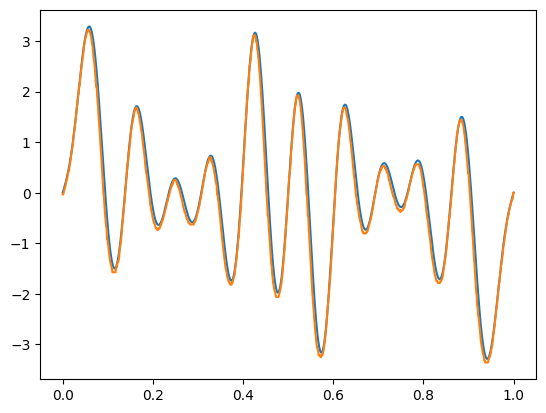

In [28]:
deco_discrete = np.zeros(1000)
for i in range(len(list(basis_array))):
    deco_discrete += c[i] * basis_array[i]
    
plt.plot(func_input, deco_discrete * h)
plt.plot(func_input, func_discrete * h)
plt.show()

In [ ]:
func_discrete -= c[3] * basis_array[i]